In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

As data is in the form of excel, use read_excel command

In [53]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [55]:



df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Perform Exploratory Data Analysis

In [56]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [57]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [58]:
# ID and Zipcode might be removed as they may not be useful for our analysis

df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [59]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [60]:
import plotly.express as px

In [61]:
fig=px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

Five point summary suggest that Experience has negative value(This should be fixed).

                we can see the Min, Max, mean and std deviation for all key attributes of the dataset
Income has too much noise and slightly skewed right, Age and exp are equally distributed

check if there is skewness in data or not!!

In [62]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [63]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

now visualise Skewness by distribution

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

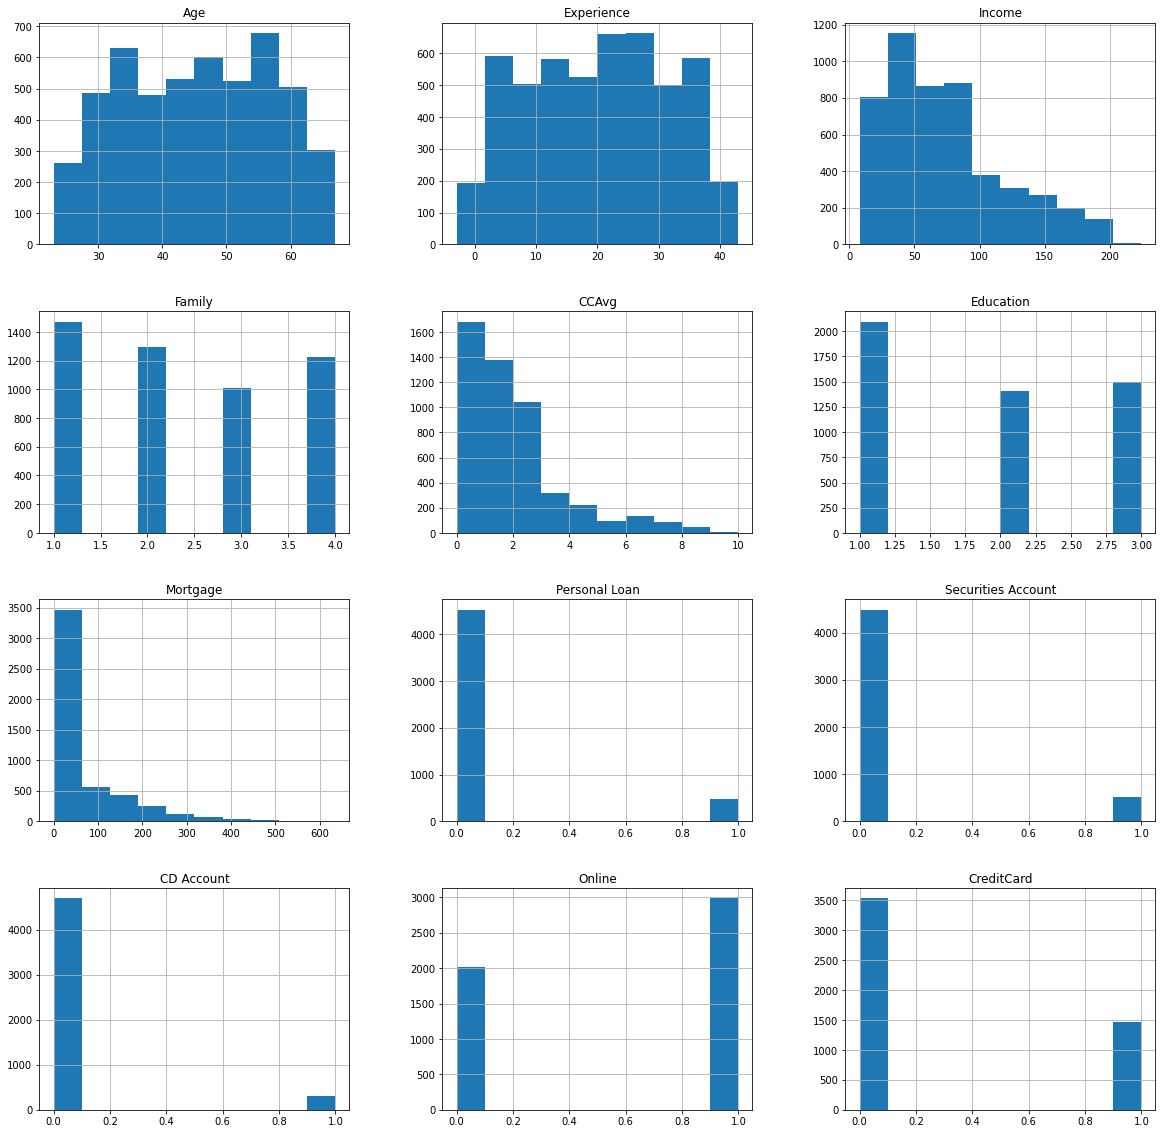

In [64]:
df.hist(figsize=(20,20))

INFERENCE from Histogram
1.Age & Experience are to an extent equally distributed
2.Income & Credit card spending are skewed to the left
3.We have more Undergraduates than Graduate and Advanced & Professional
4.60% of customers have enabled online banking and went digital

In [65]:
import seaborn as sns

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

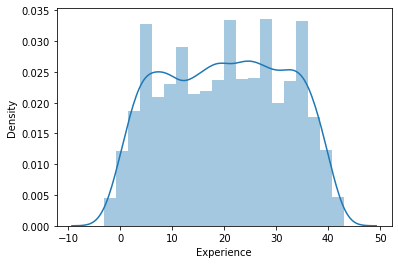

In [66]:
sns.distplot(df['Experience'])

In [67]:
df['Experience'].mean()

20.1046

In [68]:
Negative_exp=df[df['Experience']<0]
Negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

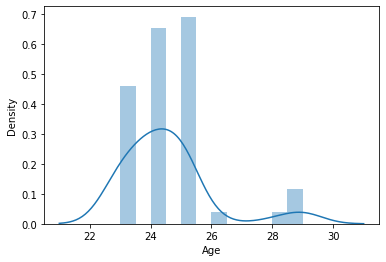

In [69]:
sns.distplot(Negative_exp['Age'])

In [70]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [71]:
Negative_exp.size

624

In [72]:
print('There are {} records which has negative values for experience, approx {} %'.format(Negative_exp.size , ((Negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [73]:
data=df.copy()

In [74]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Use numpy where function to change the negative values to mean value derived from data with the same age group

In [75]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [76]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<AxesSubplot:>

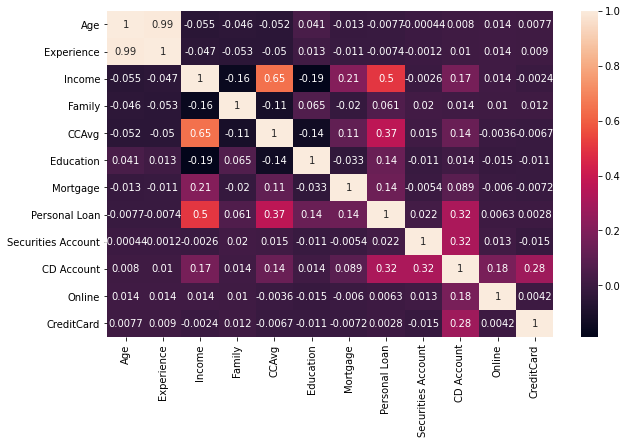

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

We could see that Age & Experience are very strongly correlated,
Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

In [78]:
data=data.drop(['Experience'],axis=1)

In [79]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [80]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [81]:
def mark(x):
    if x==1:
        return 'Undergrad'
    elif x==2:
        return 'Graduate'
    else:
        return 'Advanced/Professional'

In [82]:
data['Edu_mark']=data['Education'].apply(mark)

In [83]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [84]:
EDU_dis=data.groupby('Edu_mark')['Age'].count()

In [85]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergrad                2096
Name: Age, dtype: int64

In [86]:
fig=px.pie(data,values=EDU_dis, names=EDU_dis.index,title='Pie CHart')
fig.show()

Inference :We could see that We have more Undergraduates 41.92% than graduates(28.06%) & Advanced Professional(30.02%)

In [87]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

Lets Explore the account holder's distribution

In [88]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securites & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Holds Securites or Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return ' Holds only Securites '
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return ' Holds only Deposit'

In [89]:
data['Account_holder_category']=data.apply(Security_CD,axis=1)

In [90]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,Holds only Securites
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,Holds only Securites
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not Holds Securites or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securites or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securites or Deposit


In [91]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not Holds Securites or Deposit', ' Holds only Securites ',
       ' Holds only Deposit', 'Holds Securites & Deposit'],
      dtype='object')

In [92]:
fig=px.pie(data,values=values, names=values.index,title='Pie CHart')
fig.show()

We could see that alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we encourage those 87% to open any of these account as it will improve the assests of the bank

In [93]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [95]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

Inference:From the above plot we could say that Income of customers who availed personal loan are alomst same irrescpective of their Education

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



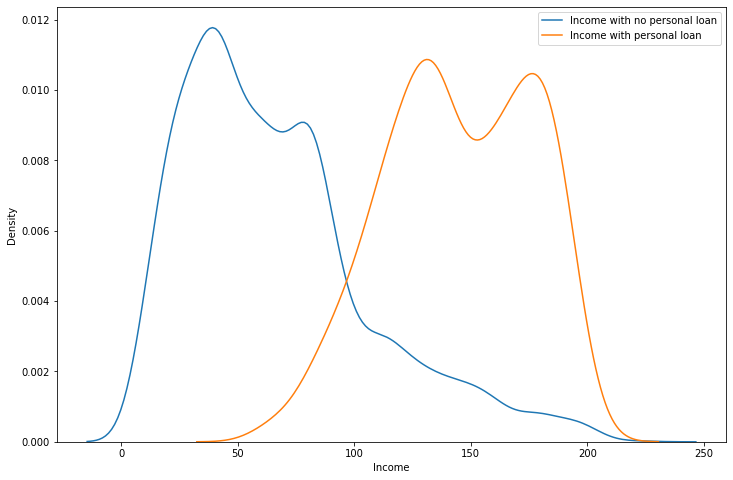

In [96]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with personal loan')
plt.legend()

Conclusion: Customers Who have availed personal loan seem to have higher income than those who do not have personal loan

automate above stuffs

In [97]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
    plt.legend()
    plt.title(title)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



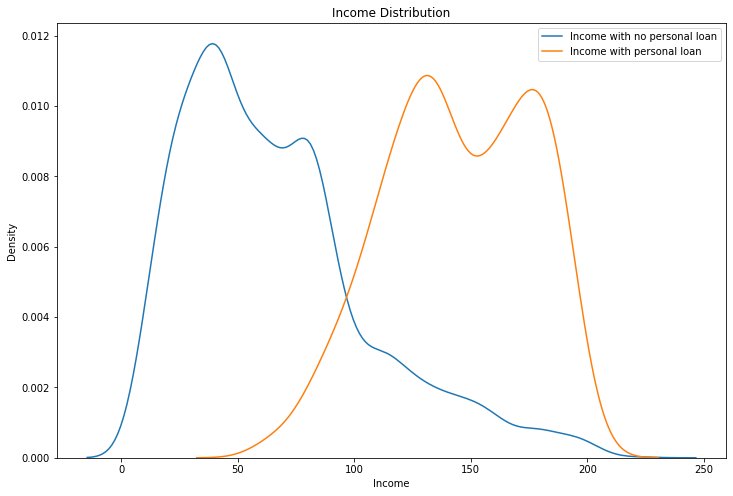

In [98]:
plot('Income','Personal Loan','Income with no personal loan','Income with personal loan','Income Distribution')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



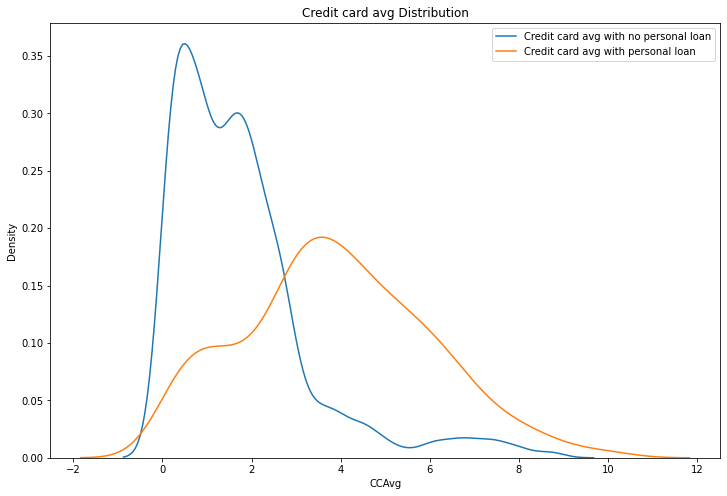

In [99]:
plot('CCAvg','Personal Loan','Credit card avg with no personal loan','Credit card avg with personal loan','Credit card avg Distribution')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



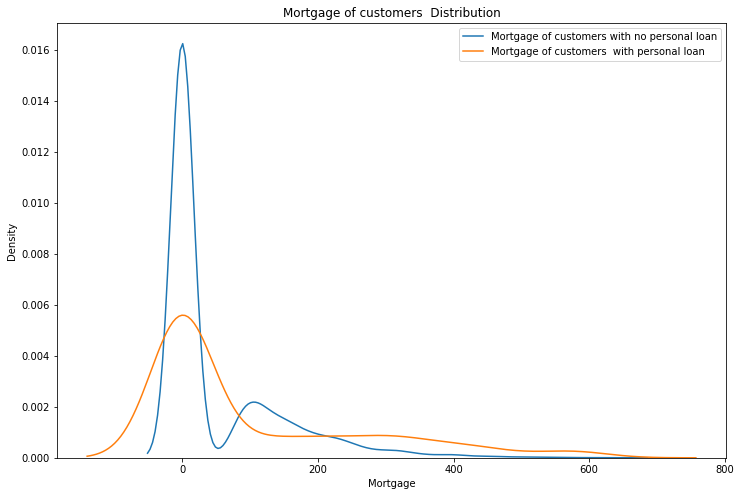

In [100]:
plot('Mortgage','Personal Loan','Mortgage of customers with no personal loan','Mortgage of customers  with personal loan','Mortgage of customers  Distribution')

People with high mortgage value, i.e more than 400K have availed personal Loan

In [101]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [102]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

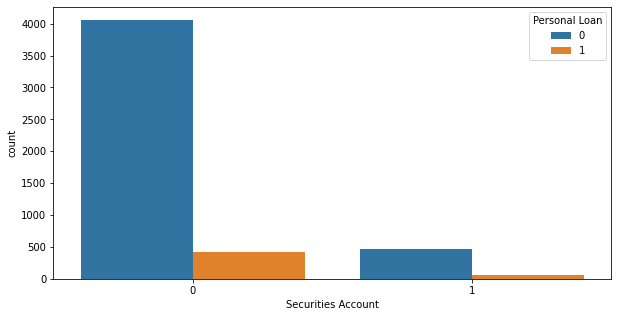

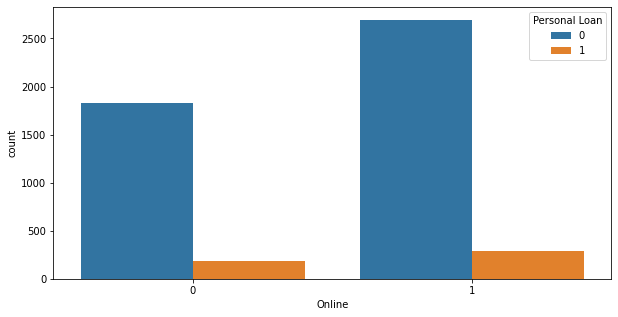

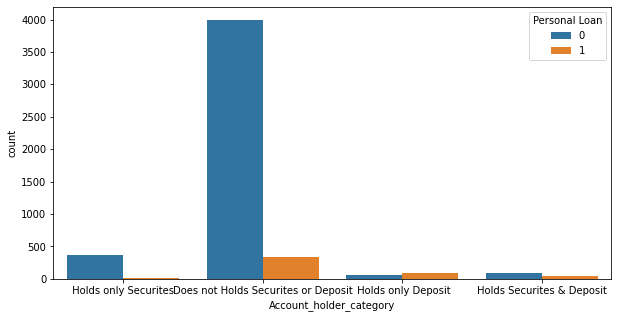

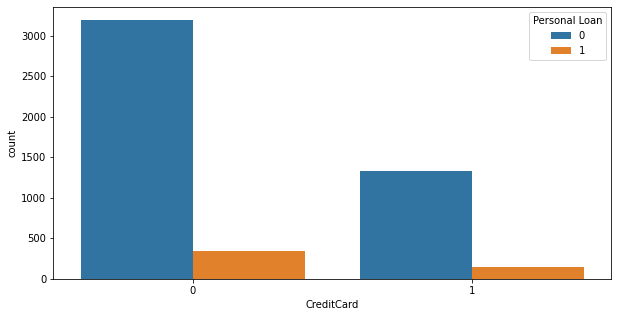

In [103]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)

From the above graph we could infer that , customers who hold deposit account & customers who do not hold either a securities account or deposit account have aviled personal loan

Perform Hypothesis Testing

Q.. How Age of a person is going to be a factor in availing loan ??? Does Income of a person have an impact on availing loan ??? Does the family size makes them to avail loan ???

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

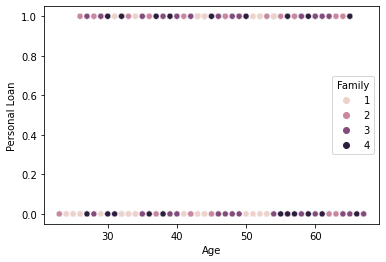

In [104]:
sns.scatterplot(data['Age'],data['Personal Loan'],hue=data['Family'])

In [105]:
import scipy.stats as stats

In [106]:
Ho='Age does not have impact on availing personal loan'
Ha='Age does  have impact on availing personal loan'

In [107]:
Age_no=np.array(data[data['Personal Loan']==0]['Age'])
Age_yes=np.array(data[data['Personal Loan']==1]['Age'])

In [108]:
t,p_value=stats.ttest_ind(Age_no,Age_yes,axis=0)
if p_value<0.05:
    print(Ha,' as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
    print(Ho,' as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on availing personal loan  as the p_value is greater than 0.05 with a value of 0.584959263705325


automate above stuffs

In [109]:
def Hypothesis(col1,col2,HO,Ha):
    arr1=np.array(data[data[col1]==0][col2])
    arr2=np.array(data[data[col1]==1][col2])
    t,p_value=stats.ttest_ind(arr1,arr2,axis=0)
    if p_value<0.05:
        print('{}, as the p_value is less than 0.05 with a value of {}'.format(Ha,p_value))
    else:
        print('{} as the p_value is greater than 0.05 with a value of {}'.format(HO,p_value))

In [110]:
Hypothesis('Personal Loan','Age',HO='Age does not have impact on availing personal loan',Ha='Age does  have impact on availing personal loan')

Age does not have impact on availing personal loan as the p_value is greater than 0.05 with a value of 0.584959263705325


Q..Income of a person has significant impact on availing Personal Loan or not?¶

In [111]:
Hypothesis(col1='Personal Loan',col2='Income',HO='Income does not have impact on availing personal loan',Ha='Income does  have impact on availing personal loan')

Income does  have impact on availing personal loan, as the p_value is less than 0.05 with a value of 0.0


Q..Number of persons in the family has significant impact on availing Personal Loan or not?


In [112]:
Hypothesis('Personal Loan','Family',HO='AgFamily does not have impact on availing personal loan',Ha='Family does  have impact on availing personal loan')

Family does  have impact on availing personal loan, as the p_value is less than 0.05 with a value of 1.4099040685673807e-05
